In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
import datetime as dt


In [ ]:
#loading data
df=pd.read_excel(r"C:\Users\Bhargav\Downloads\Online Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df=df.dropna(subset=['CustomerID'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [ ]:
#Function to format month
def get_month(x):
    return dt.datetime(x.year,x.month,1)

In [8]:
df['InvoiceMonth']=df['InvoiceDate'].apply(get_month)

In [123]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalAmount
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5,14.85


# **COHORT ANALYSIS**

In [10]:
df['CohortMonth']=df.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [11]:
# create a date element function to get a series for subtraction
def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year 

In [12]:
# get date elements for our cohort and invoice columns
_,Invoice_month,Invoice_year =  get_date_elements(df,'InvoiceMonth')
_,Cohort_month,Cohort_year =  get_date_elements(df,'CohortMonth')

In [13]:
#check the series 
Cohort_year[:10]

0    2010
1    2010
2    2010
3    2010
4    2010
5    2010
6    2010
7    2010
8    2010
9    2010
Name: CohortMonth, dtype: int32

In [124]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34


In [15]:
#create a cohort index 
year_diff = Invoice_year -Cohort_year
month_diff = Invoice_month - Cohort_month
df['CohortIndex'] = year_diff*12+month_diff+1
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5


In [ ]:
cohort_data = df.groupby(['CohortMonth','CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


## **CUSTOMER RETENTION**

In [17]:
# create a pivot table 
cohort_table = cohort_data.pivot(index='CohortMonth', columns=['CohortIndex'],values='CustomerID')
cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# change index
cohort_table.index = cohort_table.index.strftime('%B %Y')


<Axes: xlabel='CohortIndex', ylabel='CohortMonth'>

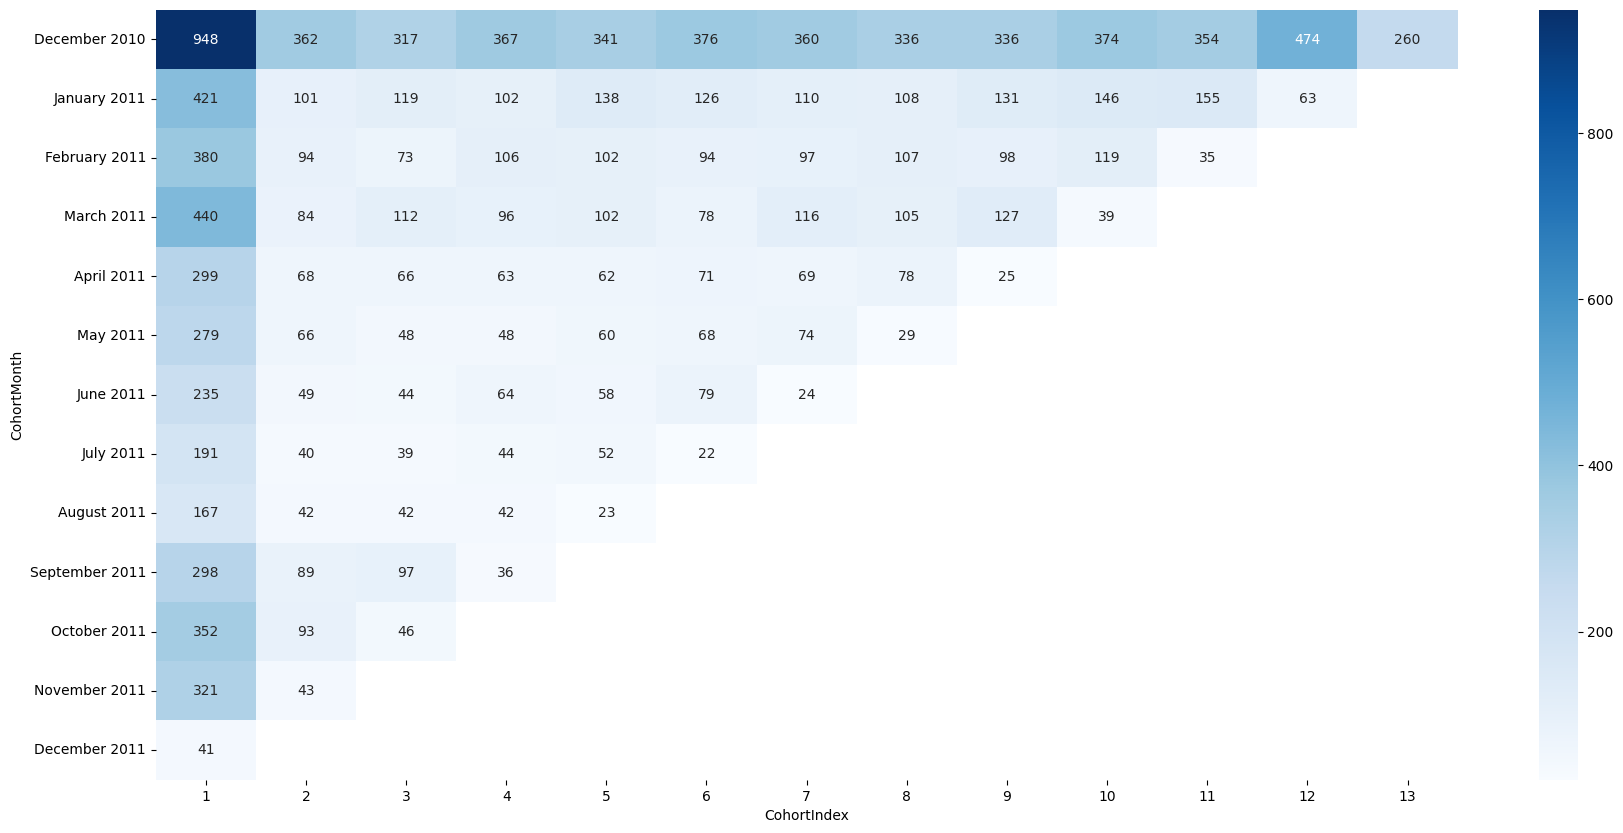

In [122]:
#visualize our results in heatmap
plt.figure(figsize=(21,10))
sns.heatmap(cohort_table,annot=True,cmap='Blues',fmt='.0f')

In [20]:
#cohort table for percentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)
new_cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CohortIndex', ylabel='CohortMonth'>

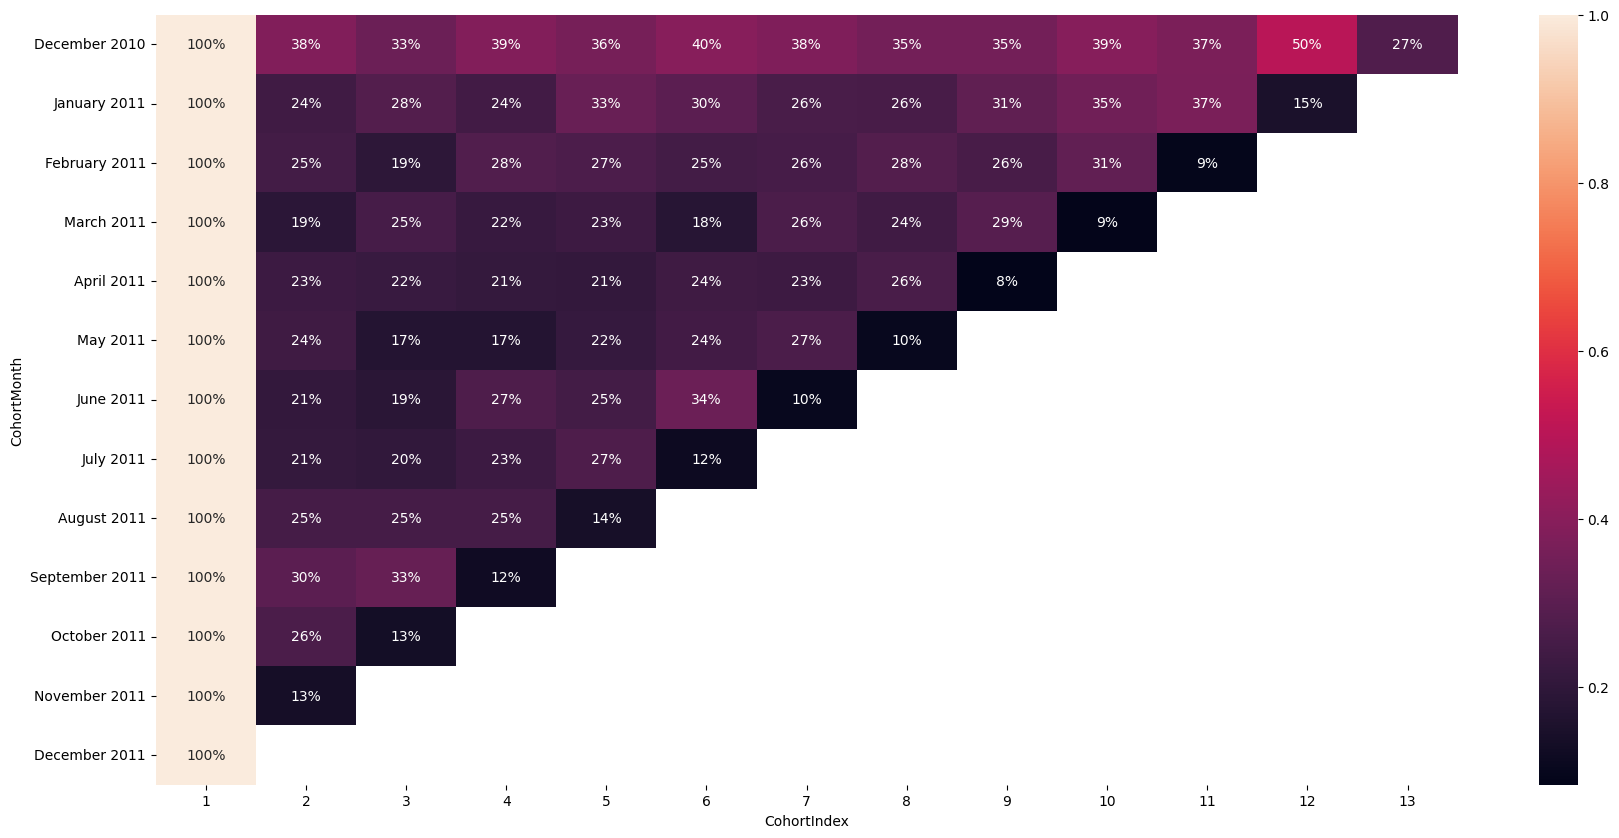

In [21]:
#create a percentages visual
plt.figure(figsize=(21,10))
sns.heatmap(new_cohort_table,annot=True,fmt='.0%')

## **NET DOLLOR REVENUE ANALYSIS**

In [22]:
df['TotalAmount']=df['Quantity']*df['UnitPrice']

In [125]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34


In [24]:
cohort_data1 = df.groupby(['CohortMonth','CohortIndex'])['TotalAmount'].sum().reset_index()
cohort_data1

,CohortMonth,CohortIndex,TotalAmount
0,2010-12-01,1,554604.02
1,2010-12-01,2,271616.52
2,2010-12-01,3,230856.22
3,2010-12-01,4,302509.39
4,2010-12-01,5,200927.98
...,...,...,...
86,2011-10-01,2,39209.92
87,2011-10-01,3,12279.46
88,2011-11-01,1,134231.38
89,2011-11-01,2,14847.53


In [26]:
# create a pivot table 
cohort_table1 = cohort_data1.pivot(index='CohortMonth', columns=['CohortIndex'],values='TotalAmount')
cohort_table1

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,554604.020,271616.52,230856.22,302509.39,200927.98,321611.71,312894.36,303907.31,310882.670,466580.68,438835.91,510982.23,182814.95
2011-01-01,203457.860,56168.55,62264.88,41516.17,82313.31,84009.54,70218.50,72886.27,74430.631,104181.16,122027.20,27850.51,NaN
2011-02-01,149521.380,25260.26,37456.25,45852.34,35666.69,31081.74,47665.32,55840.13,51861.550,60544.86,9366.67,NaN,NaN
2011-03-01,189930.080,26383.20,53693.95,40324.05,46759.97,38360.36,60622.28,61705.53,65303.870,11252.28,NaN,NaN,NaN
2011-04-01,119764.251,28921.03,24928.06,23892.08,26006.54,29653.29,28223.83,33889.78,6292.000,NaN,NaN,NaN,NaN
2011-05-01,115858.740,17663.95,18876.66,17888.89,26591.53,32951.52,31401.90,10629.02,NaN,NaN,NaN,NaN,NaN
2011-06-01,92526.510,13619.35,13893.45,29925.03,25835.74,39764.29,7925.61,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,65882.871,11126.27,15395.71,17222.51,19329.06,6056.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,77658.230,19122.50,33061.56,39925.01,14143.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
cohort_table1.index = cohort_table1.index.strftime('%B %Y')


<Axes: xlabel='CohortIndex', ylabel='CohortMonth'>

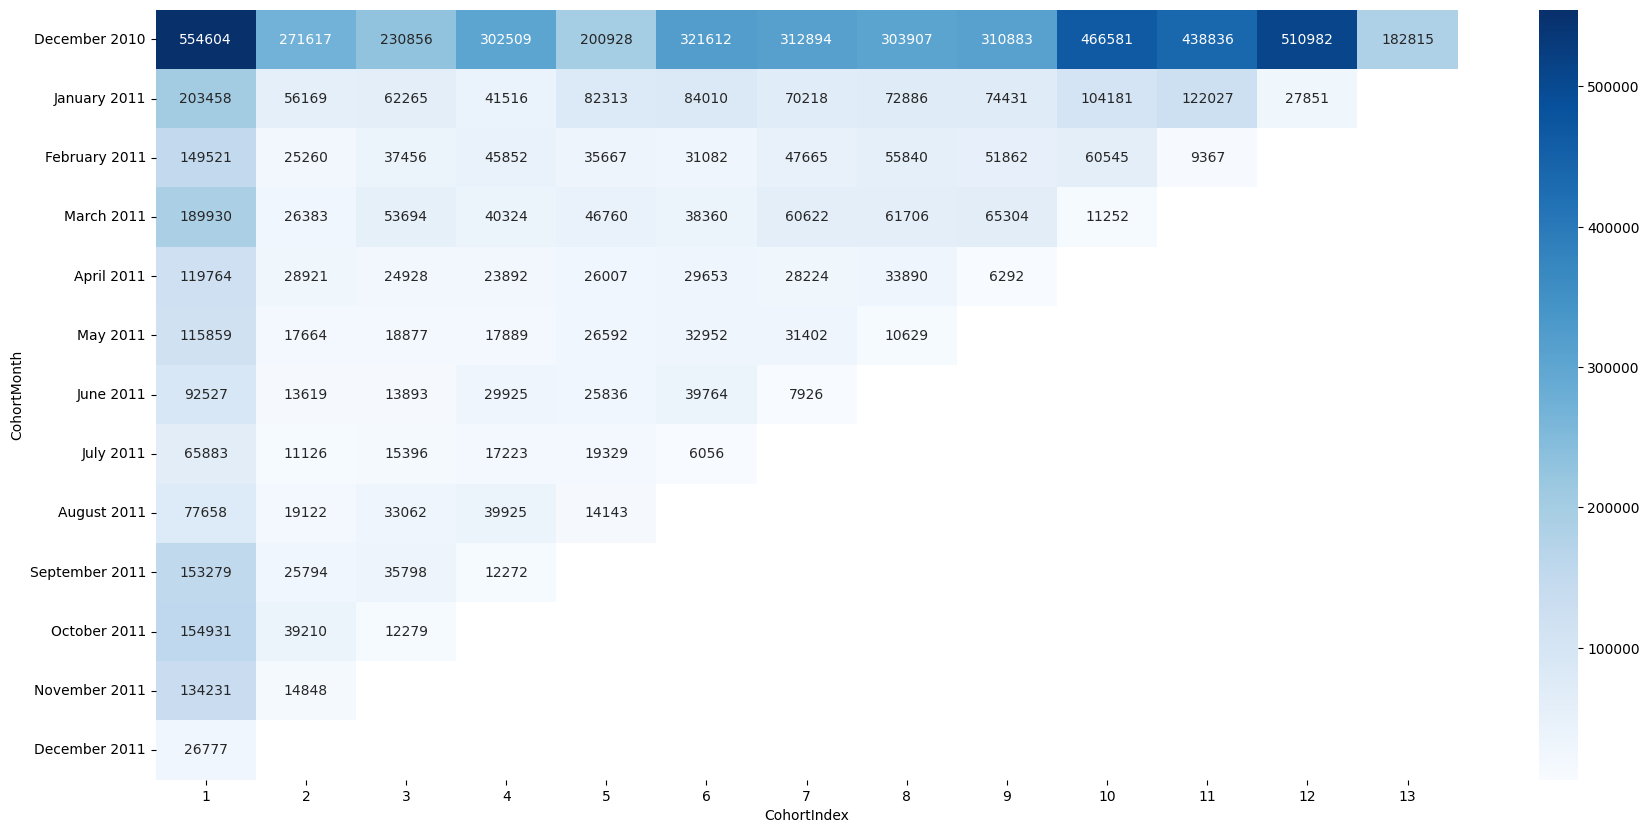

In [121]:
#visualize our results in heatmap
plt.figure(figsize=(21,10))
sns.heatmap(cohort_table1,annot=True,cmap='Blues',fmt='.0f')

In [31]:
#cohort table for percentage
new_cohort_table1 = cohort_table1.divide(cohort_table1.iloc[:,0],axis=0)
new_cohort_table1

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
December 2010,1.0,0.489749,0.416254,0.545451,0.362291,0.579894,0.564176,0.547972,0.560549,0.841286,0.791260,0.921346,0.329631
January 2011,1.0,0.276070,0.306033,0.204053,0.404572,0.412909,0.345126,0.358238,0.365828,0.512053,0.599766,0.136886,NaN
February 2011,1.0,0.168941,0.250508,0.306661,0.238539,0.207875,0.318786,0.373459,0.346850,0.404924,0.062644,NaN,NaN
March 2011,1.0,0.138910,0.282704,0.212310,0.246196,0.201971,0.319182,0.324886,0.343831,0.059244,NaN,NaN,NaN
April 2011,1.0,0.241483,0.208143,0.199493,0.217148,0.247597,0.235662,0.282971,0.052537,NaN,NaN,NaN,NaN
May 2011,1.0,0.152461,0.162928,0.154403,0.229517,0.284411,0.271036,0.091741,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.147194,0.150156,0.323421,0.279225,0.429761,0.085658,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.168880,0.233683,0.261411,0.293385,0.091923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.246239,0.425732,0.514112,0.182121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CohortIndex', ylabel='CohortMonth'>

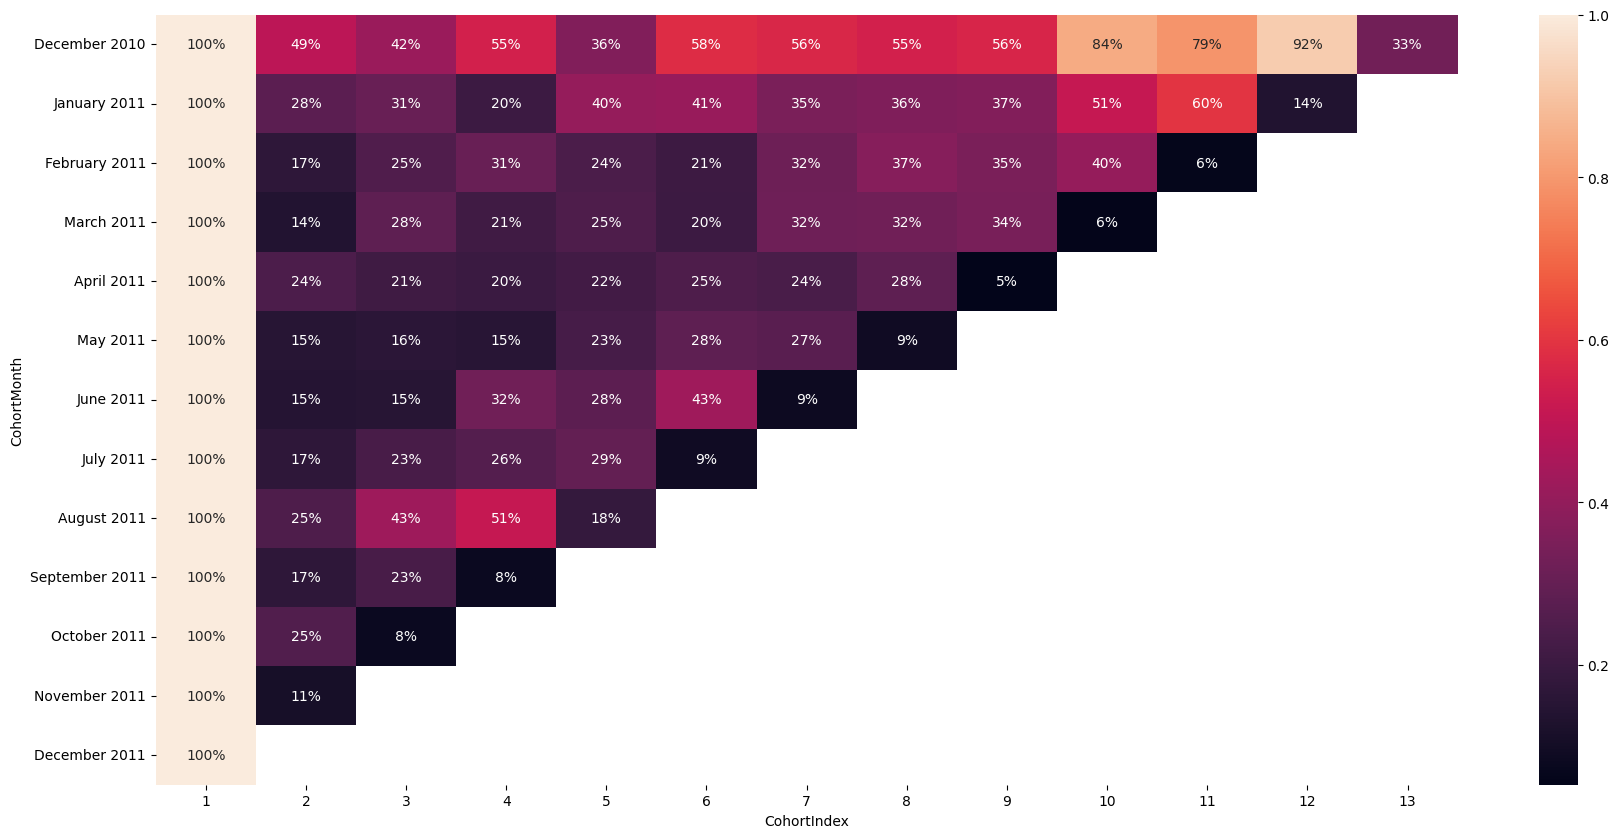

In [32]:
#create a percentages visual
plt.figure(figsize=(21,10))
sns.heatmap(new_cohort_table1,annot=True,fmt='.0%')

## **CUMMULATIVE NET DOLLOR REVENUE ANALYSIS**

In [ ]:
cohort_table2=cohort_table1.cumsum(axis=1)
cohort_table2

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
December 2010,554604.020,826220.540,1057076.760,1359586.150,1560514.130,1882125.840,2195020.200,2498927.510,2809810.180,3276390.860,3715226.770,4226209.000,4409023.95
January 2011,203457.860,259626.410,321891.290,363407.460,445720.770,529730.310,599948.810,672835.080,747265.711,851446.871,973474.071,1001324.581,NaN
February 2011,149521.380,174781.640,212237.890,258090.230,293756.920,324838.660,372503.980,428344.110,480205.660,540750.520,550117.190,NaN,NaN
March 2011,189930.080,216313.280,270007.230,310331.280,357091.250,395451.610,456073.890,517779.420,583083.290,594335.570,NaN,NaN,NaN
April 2011,119764.251,148685.281,173613.341,197505.421,223511.961,253165.251,281389.081,315278.861,321570.861,NaN,NaN,NaN,NaN
May 2011,115858.740,133522.690,152399.350,170288.240,196879.770,229831.290,261233.190,271862.210,NaN,NaN,NaN,NaN,NaN
June 2011,92526.510,106145.860,120039.310,149964.340,175800.080,215564.370,223489.980,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,65882.871,77009.141,92404.851,109627.361,128956.421,135012.581,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,77658.230,96780.730,129842.290,169767.300,183910.530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CohortIndex', ylabel='CohortMonth'>

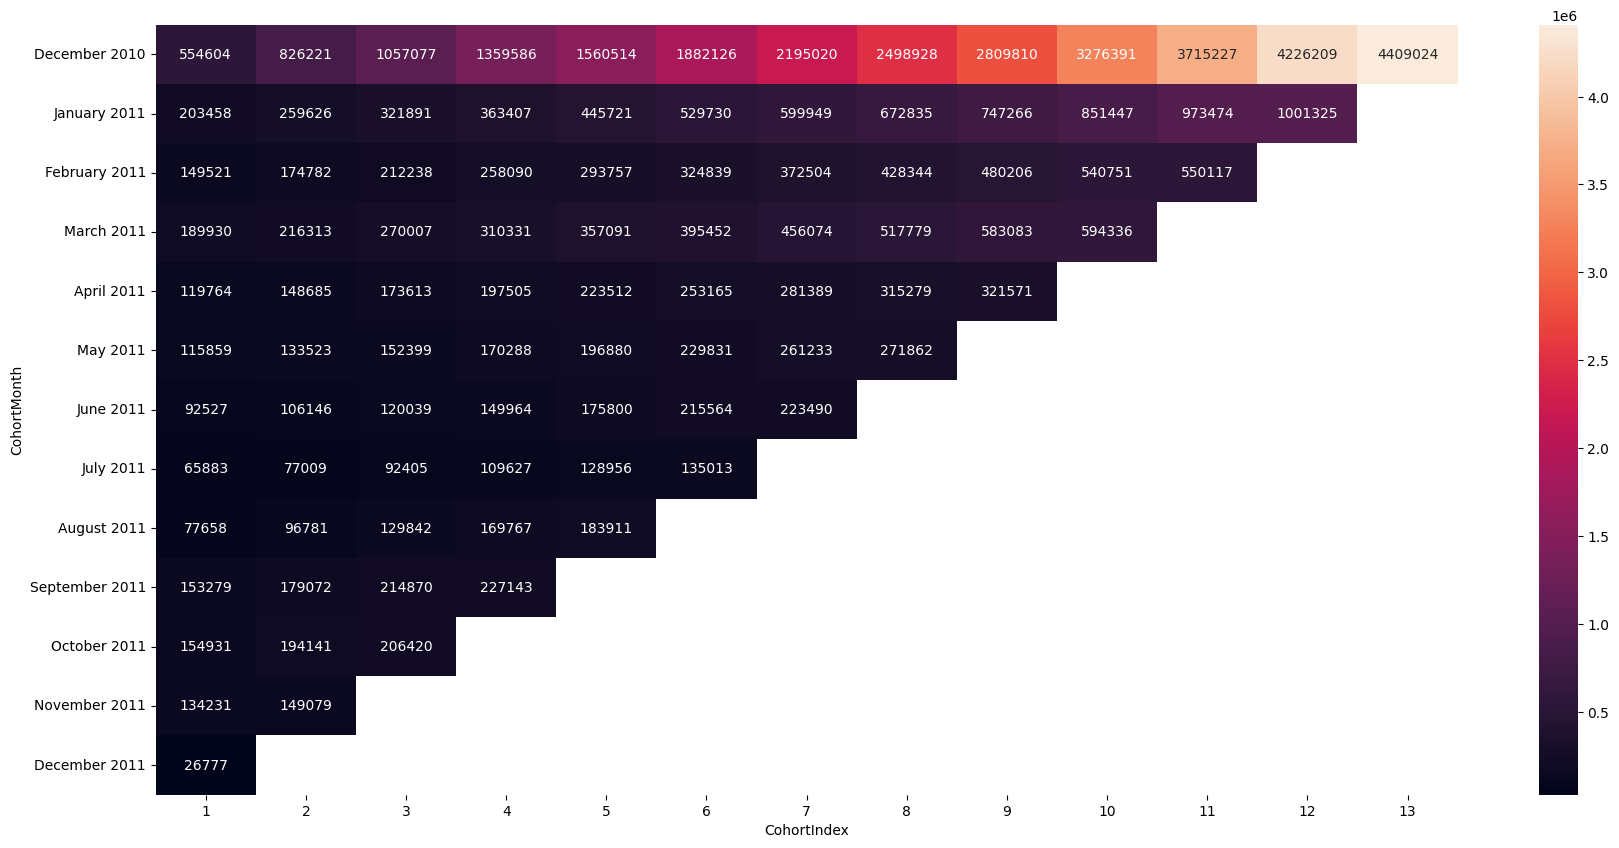

In [100]:
plt.figure(figsize=(21,10))
sns.heatmap(cohort_table2,annot=True,fmt='.0f')

In [127]:
cohort_data1

,CohortMonth,CohortIndex,TotalAmount
0,2010-12-01,1,554604.02
1,2010-12-01,2,271616.52
2,2010-12-01,3,230856.22
3,2010-12-01,4,302509.39
4,2010-12-01,5,200927.98
...,...,...,...
86,2011-10-01,2,39209.92
87,2011-10-01,3,12279.46
88,2011-11-01,1,134231.38
89,2011-11-01,2,14847.53


In [128]:
pivot = cohort_data1.pivot(index='CohortMonth', columns=['CohortIndex'], values='TotalAmount')
cumulative_revenue = pivot.cumsum(axis=1)
cumulative_revenue

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,554604.020,826220.540,1057076.760,1359586.150,1560514.130,1882125.840,2195020.200,2498927.510,2809810.180,3276390.860,3715226.770,4226209.000,4409023.95
2011-01-01,203457.860,259626.410,321891.290,363407.460,445720.770,529730.310,599948.810,672835.080,747265.711,851446.871,973474.071,1001324.581,NaN
2011-02-01,149521.380,174781.640,212237.890,258090.230,293756.920,324838.660,372503.980,428344.110,480205.660,540750.520,550117.190,NaN,NaN
2011-03-01,189930.080,216313.280,270007.230,310331.280,357091.250,395451.610,456073.890,517779.420,583083.290,594335.570,NaN,NaN,NaN
2011-04-01,119764.251,148685.281,173613.341,197505.421,223511.961,253165.251,281389.081,315278.861,321570.861,NaN,NaN,NaN,NaN
2011-05-01,115858.740,133522.690,152399.350,170288.240,196879.770,229831.290,261233.190,271862.210,NaN,NaN,NaN,NaN,NaN
2011-06-01,92526.510,106145.860,120039.310,149964.340,175800.080,215564.370,223489.980,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,65882.871,77009.141,92404.851,109627.361,128956.421,135012.581,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,77658.230,96780.730,129842.290,169767.300,183910.530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cumulative_revenue.index = cumulative_revenue.index.strftime('%B %Y')

<Axes: xlabel='CohortIndex', ylabel='CohortMonth'>

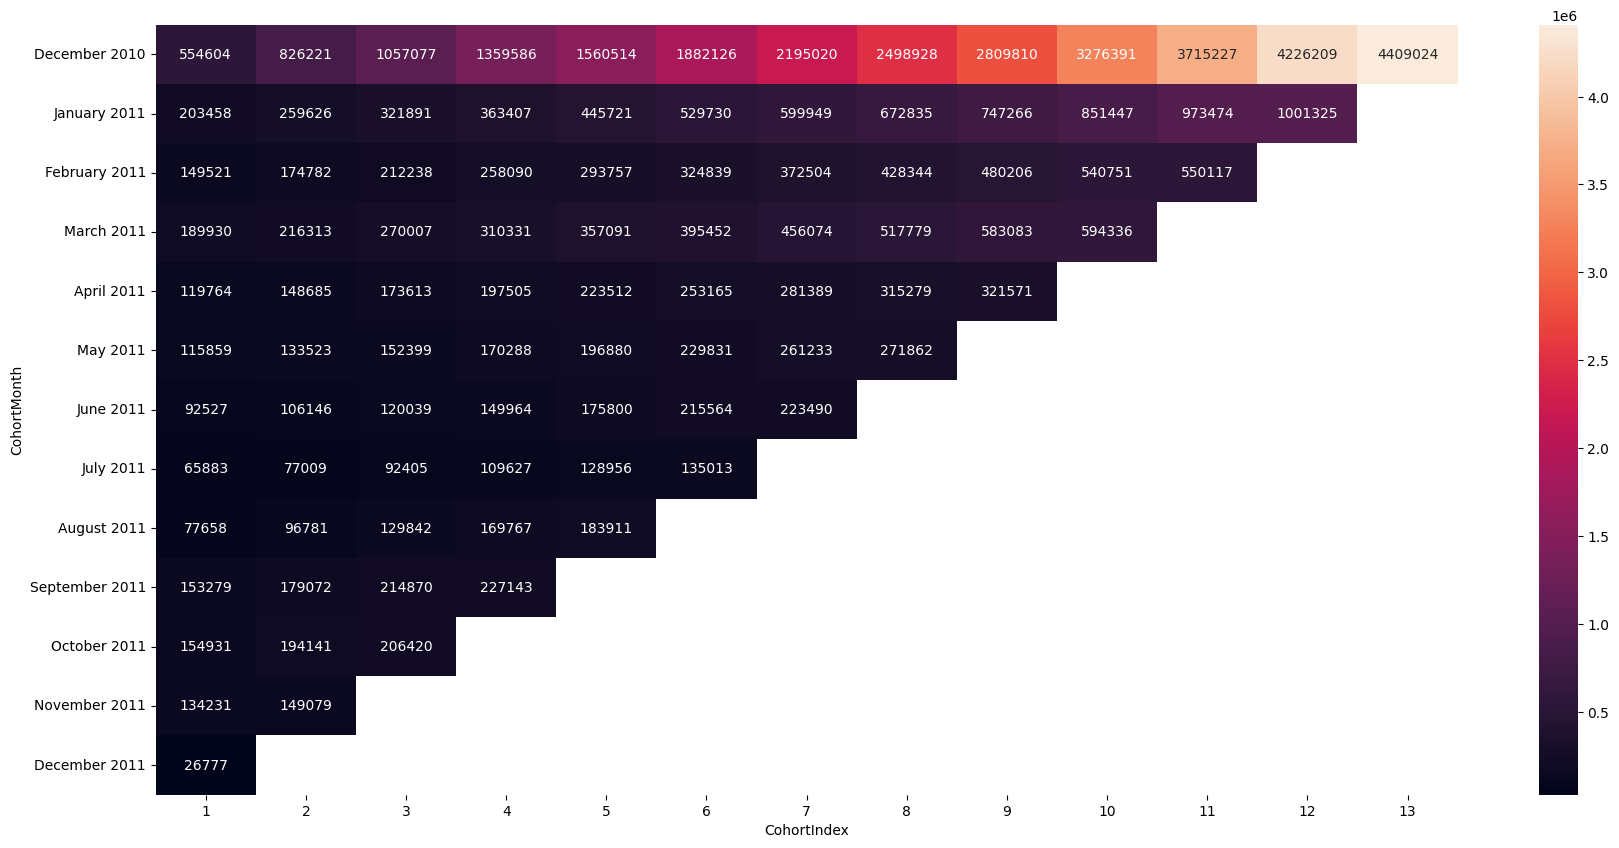

In [130]:
plt.figure(figsize=(21,10))
sns.heatmap(cumulative_revenue,annot=True,fmt='.0f')

## **CUSTOMER LIFETIME REVENUE ANALYSIS**

In [139]:
cohort_customers = df.groupby('CohortMonth',)['CustomerID'].nunique().reset_index()
cohort_customers

,CohortMonth,CustomerID
0,2010-12-01,948
1,2011-01-01,421
2,2011-02-01,380
3,2011-03-01,440
4,2011-04-01,299
5,2011-05-01,279
6,2011-06-01,235
7,2011-07-01,191
8,2011-08-01,167
9,2011-09-01,298


In [140]:
customer_counts = cohort_customers.set_index('CohortMonth')['CustomerID']
customer_counts.index = customer_counts.index.strftime('%B %Y')
lifetime_revenue = cumulative_revenue.div(customer_counts, axis=0)

In [141]:
lifetime_revenue

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
December 2010,585.025338,871.540654,1115.059873,1434.162605,1646.111951,1985.364810,2315.422152,2635.999483,2963.934789,3456.108502,3919.015580,4458.026371,4650.869146
January 2011,483.272827,616.689810,764.587387,863.200618,1058.719169,1258.266770,1425.056556,1598.183088,1774.977936,2022.439124,2312.289955,2378.443185,NaN
February 2011,393.477316,459.951684,558.520763,679.184816,773.044526,854.838579,980.273632,1127.221342,1263.699105,1423.027684,1447.676816,NaN,NaN
March 2011,431.659273,491.621091,613.652795,705.298364,811.571023,898.753659,1036.531568,1176.771409,1325.189295,1350.762659,NaN,NaN,NaN
April 2011,400.549334,497.275187,580.646625,660.553247,747.531642,846.706525,941.100605,1054.444351,1075.487829,NaN,NaN,NaN,NaN
May 2011,415.264301,478.575950,546.234229,610.352115,705.662258,823.768065,936.319677,974.416523,NaN,NaN,NaN,NaN,NaN
June 2011,393.729830,451.684511,510.805574,638.146128,748.085447,917.295191,951.021191,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,344.936497,403.189220,483.795031,573.965241,675.164508,706.872152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,465.019341,579.525329,777.498743,1016.570659,1101.260659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CohortIndex', ylabel='CohortMonth'>

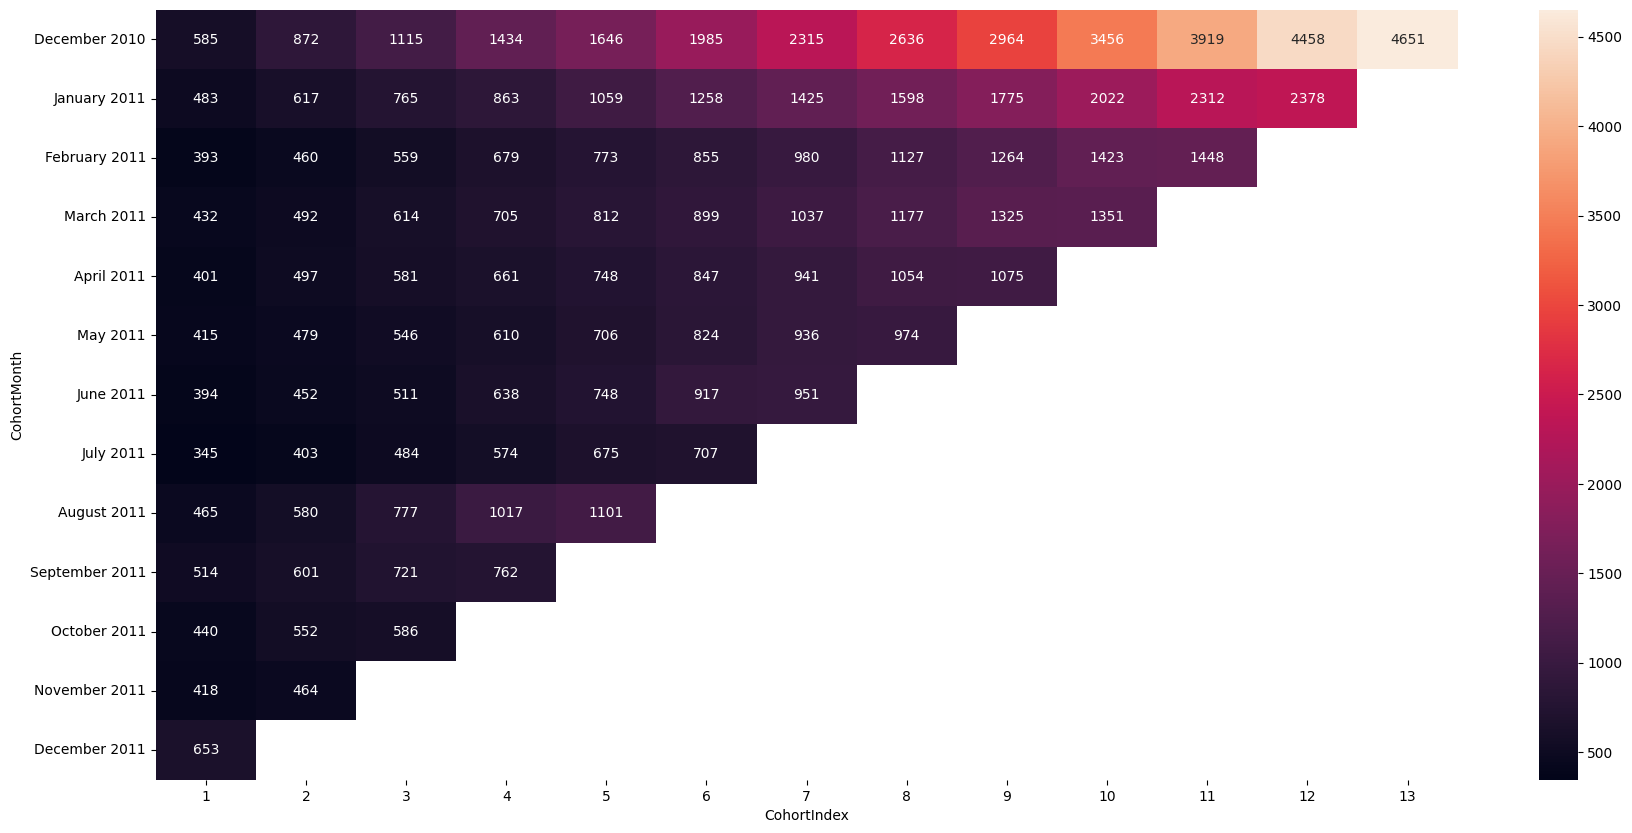

In [142]:
plt.figure(figsize=(21,10))
sns.heatmap(lifetime_revenue,annot=True,fmt='.0f')

## **CUSTOMER LIFETIME VALUE ANALYSIS**

In [ ]:
#By considering GPM=60%
customer_lifetime_value=lifetime_revenue.iloc[:, :] * 0.6
customer_lifetime_value

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
December 2010,351.015203,522.924392,669.035924,860.497563,987.667171,1191.218886,1389.253291,1581.599690,1778.360873,2073.665101,2351.409348,2674.815823,2790.521487
January 2011,289.963696,370.013886,458.752432,517.920371,635.231501,754.960062,855.033933,958.909853,1064.986762,1213.463474,1387.373973,1427.065911,NaN
February 2011,236.086389,275.971011,335.112458,407.510889,463.826716,512.903147,588.164179,676.332805,758.219463,853.816611,868.606089,NaN,NaN
March 2011,258.995564,294.972655,368.191677,423.179018,486.942614,539.252195,621.918941,706.062845,795.113577,810.457595,NaN,NaN,NaN
April 2011,240.329601,298.365112,348.387975,396.331948,448.518985,508.023915,564.660363,632.666611,645.292698,NaN,NaN,NaN,NaN
May 2011,249.158581,287.145570,327.740538,366.211269,423.397355,494.260839,561.791806,584.649914,NaN,NaN,NaN,NaN,NaN
June 2011,236.237898,271.010706,306.483345,382.887677,448.851268,550.377115,570.612715,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,206.961898,241.913532,290.277019,344.379145,405.098705,424.123291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,279.011605,347.715198,466.499246,609.942395,660.756395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CohortIndex', ylabel='CohortMonth'>

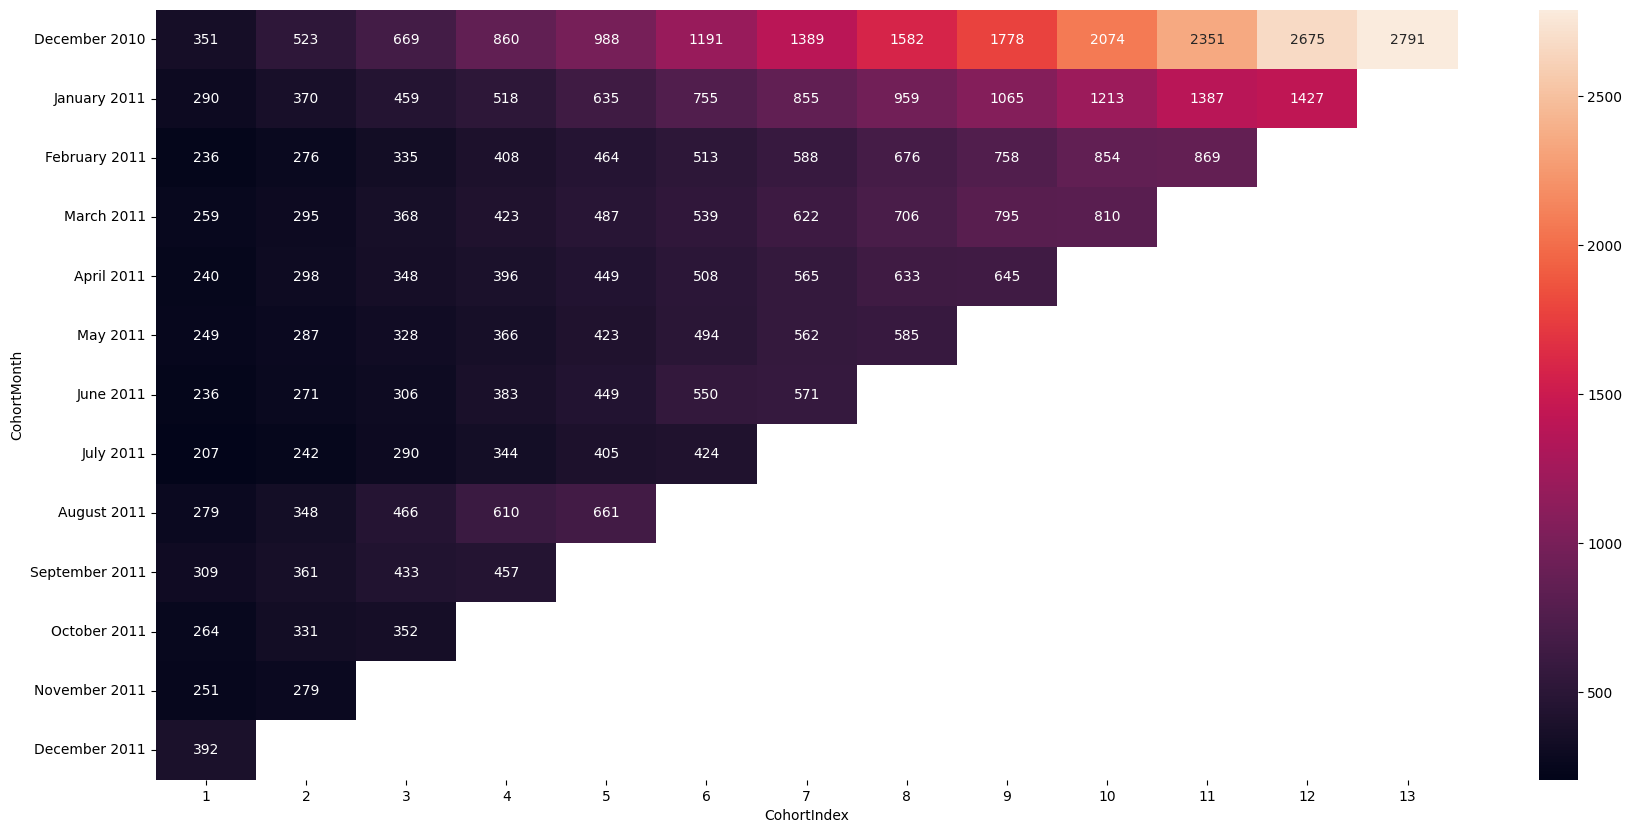

In [120]:
plt.figure(figsize=(21,10))
sns.heatmap(customer_lifetime_value,annot=True,fmt='.0f')

# **RFM ANALYSIS**

In [ ]:
reference_date=df['InvoiceDate'].max()+timedelta(days=1)

In [ ]:
reference_date

Timestamp('2011-12-10 12:50:00')

In [ ]:
rfm=df.groupby('CustomerID').agg(
    {
        "InvoiceDate": lambda x:(reference_date-x.max()).days,
        "InvoiceNo":"count",
        "TotalAmount":"sum"
    }
)

In [ ]:
rfm

,InvoiceDate,InvoiceNo,TotalAmount
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [ ]:
rfm.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalAmount':'Value'},inplace=True)

In [ ]:
rfm.head()

,Recency,Frequency,Value
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [ ]:
quantiles=rfm.quantile(q=(0.25,0.5,0.75))

def RScore(x,p,d):
    if p=="Recency":
        if x<= d[p][0.25]:
            return 4
        elif x<= d[p][0.5]:
            return 3
        elif x<= d[p][0.75]:
            return 2
        else:
            return 1
        
    else:
        if x<= d[p][0.25]:
            return 1
        elif x<= d[p][0.5]:
            return 2
        elif x<= d[p][0.75]:
            return 3
        else:
            return 4

In [ ]:
rfm['R'] = rfm['Recency'].apply(RScore,args=('Recency',quantiles,))
rfm['F'] = rfm['Frequency'].apply(RScore,args=('Frequency',quantiles,))
rfm['M'] = rfm['Value'].apply(RScore,args=('Value',quantiles,))

In [ ]:
rfm

,Recency,Frequency,Value,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2
...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1
18281.0,181,7,80.82,1,1,1
18282.0,8,13,176.60,4,1,1


In [ ]:
rfm['RFMSegment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm['RFMScore'] = rfm[['R','F','M']].sum(axis=1)


In [ ]:
rfm.head()

,Recency,Frequency,Value,R,F,M,RFMSegment,RFMScore
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3
12347.0,2,182,4310.00,4,4,4,444,12
12348.0,75,31,1797.24,2,2,4,224,8
12349.0,19,73,1757.55,3,3,4,334,10
12350.0,310,17,334.40,1,1,2,112,4


In [ ]:
segment_labels = ["Low-Value","Mid-Value","High-Value"]

def assign_segment(score):
    if score <5:
        return "Low-Value"
    elif score <9:
        return "Mid-Value"
    else:
        return "High-Value"
    
rfm["RFM_Segment_Label"]=rfm['RFMScore'].apply(assign_segment)

In [ ]:
rfm.head()

,Recency,Frequency,Value,R,F,M,RFMSegment,RFMScore,RFM_Segment_Label
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3,Low-Value
12347.0,2,182,4310.00,4,4,4,444,12,High-Value
12348.0,75,31,1797.24,2,2,4,224,8,Mid-Value
12349.0,19,73,1757.55,3,3,4,334,10,High-Value
12350.0,310,17,334.40,1,1,2,112,4,Low-Value


In [ ]:
segment_counts=rfm['RFM_Segment_Label'].value_counts().reset_index()
segment_counts.columns=['RFM_Segment','Count']
segment_counts=segment_counts.sort_values('RFM_Segment')

In [ ]:
segment_counts

,RFM_Segment,Count
1,High-Value,1690
2,Low-Value,783
0,Mid-Value,1899


C:\Users\Bhargav\AppData\Local\Temp\ipykernel_20244\2293422622.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_counts, x='RFM_Segment', y='Count', palette='deep')


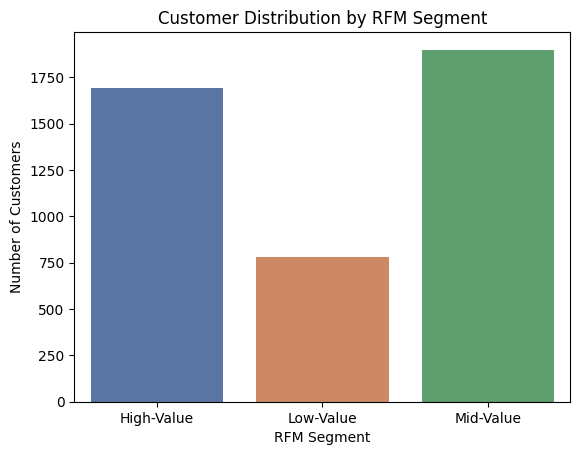

In [ ]:
sns.barplot(data=segment_counts, x='RFM_Segment', y='Count', palette='deep')
plt.title("Customer Distribution by RFM Segment")
plt.xlabel("RFM Segment")
plt.ylabel("Number of Customers")
plt.show()


In [ ]:
rfm['RFM_Customer_Segments']=''
rfm.loc[rfm['RFMScore']>=9,'RFM_Customer_Segments']="VIP/Loyal"
rfm.loc[(rfm['RFMScore']>=6) & (rfm['RFMScore']<9),'RFM_Customer_Segments']="Potential Loyal"
rfm.loc[(rfm['RFMScore']>=5) & (rfm['RFMScore']<6),'RFM_Customer_Segments']="At Risk Customer"
rfm.loc[(rfm['RFMScore']>=4) & (rfm['RFMScore']<5),'RFM_Customer_Segments']="Can't Lose"
rfm.loc[(rfm['RFMScore']>=3) & (rfm['RFMScore']<4),'RFM_Customer_Segments']="Lost"
segment_counts=rfm['RFM_Customer_Segments'].value_counts().sort_index()

In [ ]:
segment_counts

RFM_Customer_Segments
At Risk Customer     517
Can't Lose           391
Lost                 392
Potential Loyal     1382
VIP/Loyal           1690
Name: count, dtype: int64

In [ ]:
segment_product_counts=rfm.groupby(['RFM_Segment_Label','RFM_Customer_Segments']).size().reset_index(name='count')
segment_product_counts=segment_product_counts.sort_values("count",ascending=False)

In [ ]:
segment_product_counts

,RFM_Segment_Label,RFM_Customer_Segments,count
0,High-Value,VIP/Loyal,1690
4,Mid-Value,Potential Loyal,1382
3,Mid-Value,At Risk Customer,517
2,Low-Value,Lost,392
1,Low-Value,Can't Lose,391


C:\Users\Bhargav\AppData\Local\Temp\ipykernel_20244\2200405584.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_product_counts, x='RFM_Customer_Segments', y='count', palette='deep')


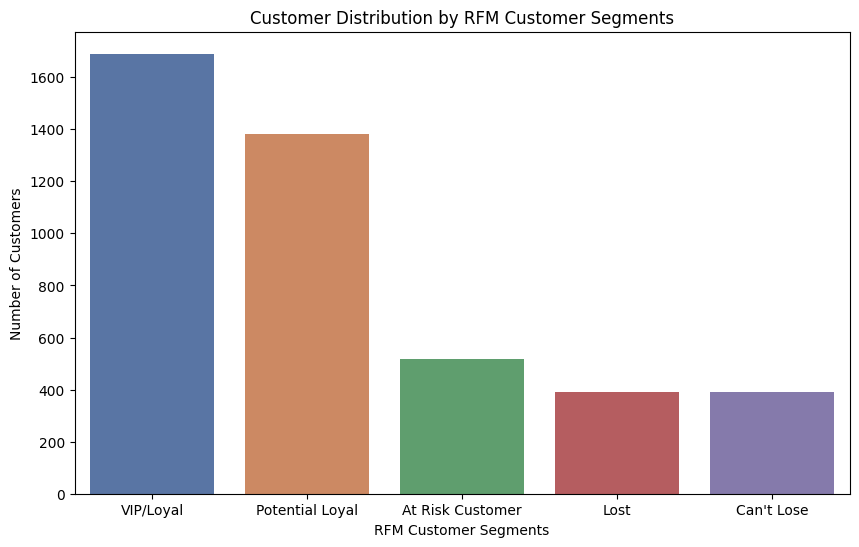

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_product_counts, x='RFM_Customer_Segments', y='count', palette='deep')
plt.title("Customer Distribution by RFM Customer Segments")
plt.xlabel("RFM Customer Segments")
plt.ylabel("Number of Customers")
plt.show()


In [ ]:
vip_segment=rfm[rfm['RFM_Customer_Segments']=="VIP/Loyal"]

<Axes: ylabel='Recency'>

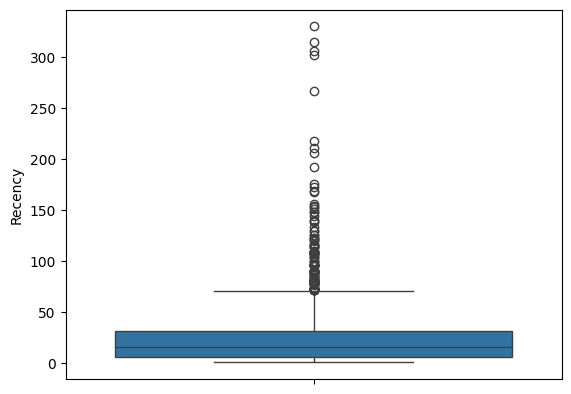

In [ ]:
sns.boxplot(vip_segment['Recency'])

<Axes: ylabel='Frequency'>

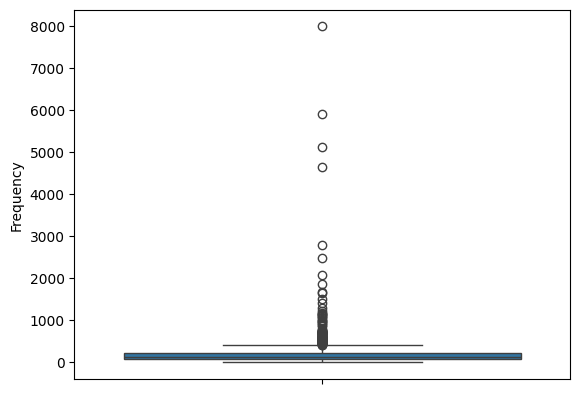

In [ ]:
sns.boxplot(vip_segment['Frequency'])

<Axes: ylabel='Value'>

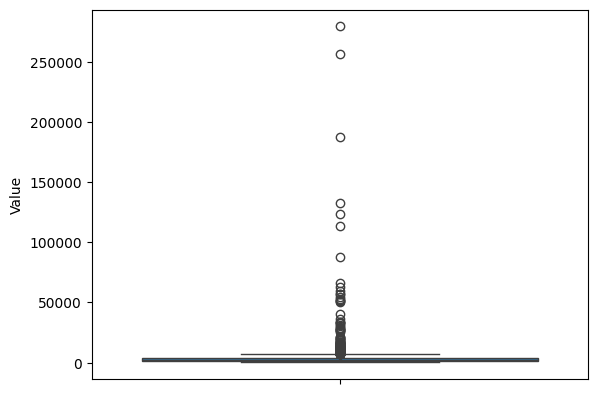

In [ ]:
sns.boxplot(vip_segment['Value'])

In [ ]:
correlation_matrix=vip_segment[['R','F','M']].corr()
correlation_matrix

,R,F,M
R,1.000000,-0.089849,-0.096407
F,-0.089849,1.000000,0.331813
M,-0.096407,0.331813,1.000000


In [ ]:
segment_scores=rfm.groupby("RFM_Customer_Segments")[['R','F','M']].mean().reset_index()
segment_scores

,RFM_Customer_Segments,R,F,M
0,At Risk Customer,1.735010,1.624758,1.640232
1,Can't Lose,1.462916,1.273657,1.263427
2,Lost,1.000000,1.000000,1.000000
3,Potential Loyal,2.444284,2.253256,2.301737
4,VIP/Loyal,3.404142,3.568639,3.559172


In [ ]:
segment_scores_long = segment_scores.melt(id_vars="RFM_Customer_Segments", value_vars=["R", "F", "M"], 
                  var_name="Metric", value_name="Value")


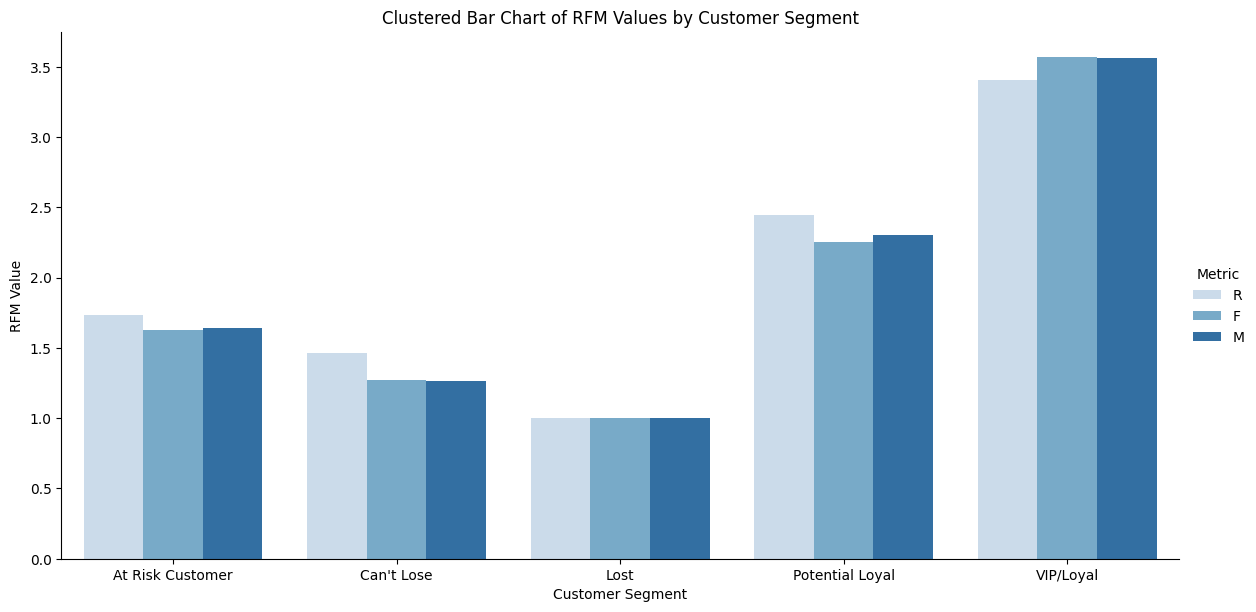

In [ ]:
sns.catplot(data=segment_scores_long, x="RFM_Customer_Segments", y="Value", hue="Metric", kind="bar", height=6, aspect=2,palette="Blues")
plt.title("Clustered Bar Chart of RFM Values by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("RFM Value")
plt.show()


### **THANK YOU**